In [85]:
import pandas as pd
import numpy as np
from player import Player
from ratingscraper import *
from scorescraper import *
from estimation import *
from simulations import *
from tournament import Tournament, Cup, WorldCup, game
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('candidates.csv')

In [3]:
df

,Player,FideId
0,Shakriyar Mamedyarov,13401319
1,Vladimir Kramnik,4101588
2,Wesley So,5202213
3,Levon Aronian,13300474
4,Fabiano Caruana,2020009
5,Ding Liren,8603677
6,Alexander Grischuk,4126025
7,Sergey Karjakin,14109603


In [4]:
players = []
for x in df.iterrows():
    row = x[1]
    players.append(Player(name=row[0], fide_id=row[1]))

In [5]:
players

[Shakriyar Mamedyarov (None),
 Vladimir Kramnik (None),
 Wesley So (None),
 Levon Aronian (None),
 Fabiano Caruana (None),
 Ding Liren (None),
 Alexander Grischuk (None),
 Sergey Karjakin (None)]

In [6]:
scrape_ratings(players)

In [9]:
scrape_scores(players)

Fetching head-to-head score between Shakriyar Mamedyarov and Shakriyar Mamedyarov
Fetching head-to-head score between Shakriyar Mamedyarov and Vladimir Kramnik
Fetching head-to-head score between Shakriyar Mamedyarov and Wesley So
Fetching head-to-head score between Shakriyar Mamedyarov and Levon Aronian
Fetching head-to-head score between Shakriyar Mamedyarov and Fabiano Caruana
Fetching head-to-head score between Shakriyar Mamedyarov and Ding Liren
Fetching head-to-head score between Shakriyar Mamedyarov and Alexander Grischuk
Fetching head-to-head score between Shakriyar Mamedyarov and Sergey Karjakin
Fetching head-to-head score between Vladimir Kramnik and Shakriyar Mamedyarov
Fetching head-to-head score between Vladimir Kramnik and Vladimir Kramnik
Fetching head-to-head score between Vladimir Kramnik and Wesley So
Fetching head-to-head score between Vladimir Kramnik and Levon Aronian
Fetching head-to-head score between Vladimir Kramnik and Fabiano Caruana
Fetching head-to-head sco

In [14]:
pairings = [[(1,6),(7,0),(3,5),(4,2)],
[(6,2),(5,4),(0,3),(1,7)],
[(7,6),(3,1),(4,0),(2,5)],
[(6,5),(0,2),(1,4),(7,3)],
[(3,6),(4,7),(2,1),(5,0)],
[(4,6),(2,3),(5,7),(0,1)],
[(6,0),(1,5),(7,2),(3,4)],
[(6,1),(0,7),(5,3),(2,4)],
[(2,6),(4,5),(3,0),(7,1)],
[(6,7),(1,3),(0,4),(5,2)],
[(5,6),(2,0),(4,1),(3,7)],
[(6,3),(7,4),(1,2),(0,5)],
[(0,6),(5,1),(2,7),(4,3)],
[(6,4),(3,2),(7,5),(1,0)]]

In [15]:
current_round = 1

In [19]:
def simulate_candidates_game(player1, player2, rating_weight, verbosity):
    player1_score = game(player1, player2, rating_weight, "Classical", verbosity)
    player1.score += player1_score
    player2.score += 1 - player1_score

In [20]:
def simulate_candidates_round(current_round, rating_weight, verbosity):
    for matchup in pairings[current_round]:
        simulate_candidates_game(players[matchup[0]], players[matchup[1]], rating_weight, verbosity)

In [80]:
def simulate_candidates_tournament(current_round, N, rating_weight, verbosity):
    for player in players:
        player.positions = []
        player.scores = []
    for i in range(N):
        for player in players:
            player.score = 0
        for j in range(current_round, 14):
            simulate_candidates_round(j, rating_weight, verbosity)

        for player in players:
            player.scores.append(player.score)
            
        sorted_players = sorted(players, key=lambda x: x.score, reverse=True)    
        for player in players:
            player.positions.append(sorted_players.index(player))

In [122]:
simulate_candidates_tournament(1, 10000, 10, 0)

In [142]:
def player_results(player):
    print("----------------")
    print("Player:", player)
    print("Expected score:", np.mean(player.scores))
    print("Expected finishing position:", np.mean(player.positions))
    # sb.distplot(player.positions, hist=False)

In [144]:
for player in players:
    player_results(player)

----------------
Player: Shakriyar Mamedyarov (2809)
Expected score: 6.97685
Expected finishing position: 2.3235
----------------
Player: Vladimir Kramnik (2800)
Expected score: 6.7773
Expected finishing position: 2.7515
----------------
Player: Wesley So (2799)
Expected score: 6.76355
Expected finishing position: 2.892
----------------
Player: Levon Aronian (2794)
Expected score: 6.6861
Expected finishing position: 3.098
----------------
Player: Fabiano Caruana (2784)
Expected score: 6.48025
Expected finishing position: 3.5987
----------------
Player: Ding Liren (2769)
Expected score: 6.15525
Expected finishing position: 4.2439
----------------
Player: Alexander Grischuk (2767)
Expected score: 6.105
Expected finishing position: 4.4475
----------------
Player: Sergey Karjakin (2763)
Expected score: 6.0557
Expected finishing position: 4.6449


Player: Shakriyar Mamedyarov (2809)
Expected score: 6.97685
Expected finishing position: 2.3235


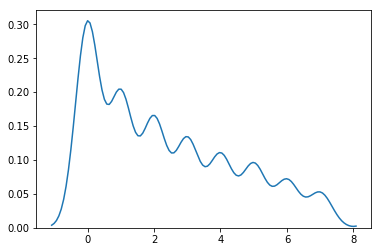

In [132]:
plot_player_results(players[0])

Player: Vladimir Kramnik (2800)
Expected score: 6.7773
Expected finishing position: 2.7515


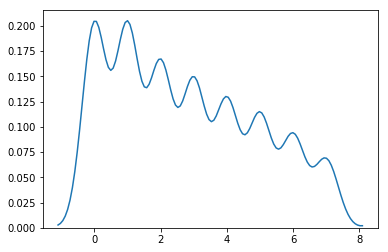

In [133]:
plot_player_results(players[1])

Player: Wesley So (2799)
Expected score: 6.76355
Expected finishing position: 2.892


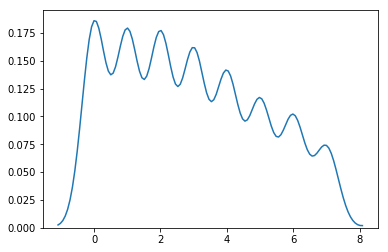

In [134]:
plot_player_results(players[2])

Player: Levon Aronian (2794)
Expected score: 6.6861
Expected finishing position: 3.098


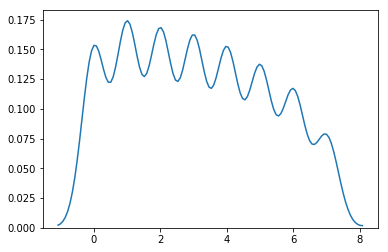

In [135]:
plot_player_results(players[3])

Player: Fabiano Caruana (2784)
Expected score: 6.48025
Expected finishing position: 3.5987


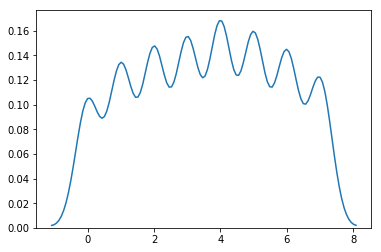

In [136]:
plot_player_results(players[4])

Player: Ding Liren (2769)
Expected score: 6.15525
Expected finishing position: 4.2439


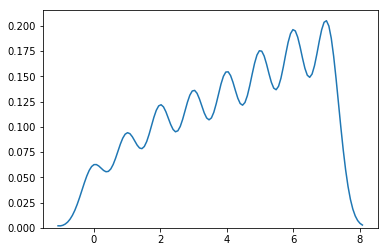

In [138]:
plot_player_results(players[5])

Player: Alexander Grischuk (2767)
Expected score: 6.105
Expected finishing position: 4.4475


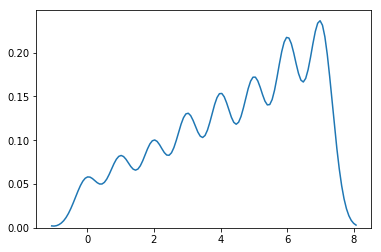

In [139]:
plot_player_results(players[6])

Player: Sergey Karjakin (2763)
Expected score: 6.0557
Expected finishing position: 4.6449


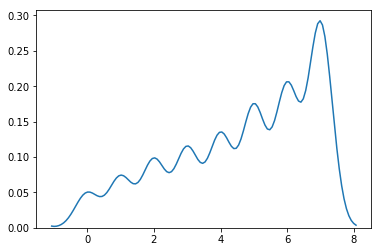

In [141]:
plot_player_results(players[7])